In [14]:
import numpy as np
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#set up the initial trainiing set
n_initial = 100

In [3]:
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [5]:
import pandas as pd

In [6]:
X_frame = pd.DataFrame(X)

In [7]:
X_frame.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [8]:
X_train

array([[ 0.,  1.,  8., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ..., 13.,  2.,  0.],
       [ 0.,  0.,  8., ..., 15.,  1.,  0.],
       ...,
       [ 0.,  0.,  8., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ...,  5.,  0.,  0.],
       [ 0.,  0.,  9., ..., 15.,  6.,  0.]])

In [9]:
initial_idx = np.random.choice(range(len(X_train)),size=n_initial,replace = False)
X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx,axis=0),np.delete(y_train, initial_idx,axis=0)

In [10]:
X_initial[0:5]

array([[ 0.,  0.,  0.,  6., 16.,  6.,  0.,  0.,  0.,  0.,  5., 16., 10.,
         0.,  0.,  0.,  0.,  2., 15., 14.,  0.,  7.,  1.,  0.,  0.,  6.,
        16.,  3.,  3., 16.,  9.,  0.,  0., 11., 16.,  8., 11., 16.,  6.,
         0.,  0.,  3., 15., 16., 16., 15.,  1.,  0.,  0.,  0.,  0.,  3.,
        16.,  7.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  3.,  0.,  0.],
       [ 0.,  2.,  9., 15., 16., 15.,  2.,  0.,  0., 11., 11.,  5.,  9.,
        16.,  3.,  0.,  0.,  0.,  0.,  0.,  9., 12.,  0.,  0.,  0.,  0.,
         0.,  0.,  6., 15.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  9.,
         0.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  5.,  3.,
         6., 15.,  7.,  0.,  0.,  0., 12., 16., 15.,  9.,  1.,  0.],
       [ 0.,  5., 16., 16., 16., 16., 10.,  0.,  0.,  4., 10.,  4.,  4.,
         4.,  0.,  0.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,
        16., 13.,  7.,  1.,  0.,  0.,  0.,  0.,  2.,  8., 14., 14.,  2.,
         0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,  0.,  

In [11]:
y_initial[0:5]

array([4, 3, 5, 1, 2])

In [12]:
#initialize the learner
learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial,y_training=y_initial
)

In [13]:
n_queries = 20

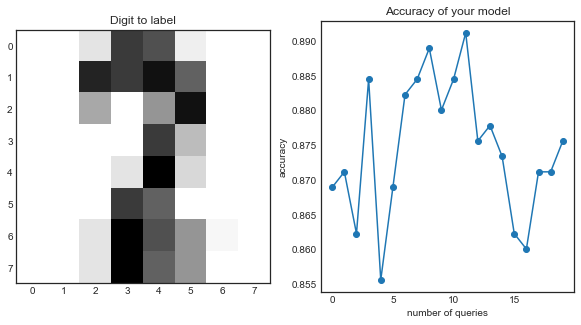

Which digit is this?


In [15]:
accuracy_scores = [learner.score(X_test, y_test)]

for i in range(n_queries):
    display.clear_output(wait=True)
    query_idx, query_inst = learner.query(X_pool)
    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title('Digit to label')
        plt.imshow(query_inst.reshape(8, 8))
        plt.subplot(1, 2, 2)
        plt.title('Accuracy of your model')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')

    print("Which digit is this?")
    y_new = np.array([int(input())], dtype=int)
    learner.teach(query_inst.reshape(1, -1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner.score(X_test, y_test))